<a href="https://colab.research.google.com/github/serinamarie/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/Grill_Statistics_Probability_Assignment_And_Sampling_Confidence_Intervals_And_Hypothesis_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Assignment 1*

# Apply the t-test to real data

Your assignment is to determine which issues have "statistically significant" differences between political parties in this [1980s congressional voting data](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records). The data consists of 435 instances (one for each congressperson), a class (democrat or republican), and 16 binary attributes (yes or no for voting for or against certain issues). Be aware - there are missing values!

Your goals:

1. Load and clean the data (or determine the best method to drop observations when running tests)
2. Using hypothesis testing, find an issue that democrats support more than republicans with p < 0.01
3. Using hypothesis testing, find an issue that republicans support more than democrats with p < 0.01
4. Using hypothesis testing, find an issue where the difference between republicans and democrats has p > 0.1 (i.e. there may not be much of a difference)

Note that this data will involve *2 sample* t-tests, because you're comparing averages across two groups (republicans and democrats) rather than a single group against a null hypothesis.

Stretch goals:

1. Refactor your code into functions so it's easy to rerun with arbitrary variables
2. Apply hypothesis testing to your personal project data (for the purposes of this notebook you can type a summary of the hypothesis you formed and tested)

In [0]:
import pandas as pd
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel

In [0]:
#Rename columns
cols = ['party', 'handicapped_infants', 
'water_project_cost_sharing',
'adoption_of_budget_resolution',
'physician_fee_freeze' ,
'el_salvador_aid',
'religious_groups_in_schools',
'anti_satellite_test_ban',
'aid_to_nicaraguan_contras',
'mx_missile',
'immigration',
'synfuels_corporation_cutback',
'education_spending',
'superfund_right_to_sue',
'crime',
'duty_free_exports',
'export_administration_act_south_africa']

In [0]:
#Import data
df = pd.read_csv('house-votes-84.data', names= cols)
print(df.head())
df.shape

        party  ... export_administration_act_south_africa
0  republican  ...                                      y
1  republican  ...                                      ?
2    democrat  ...                                      n
3    democrat  ...                                      y
4    democrat  ...                                      y

[5 rows x 17 columns]


(435, 17)

In [0]:
#DROP columns with all (or nearly all) null values
df = df.drop([183,248])


In [0]:
#Replace n/y/? with 0, 1, or 0.5
df['crime'] = df['crime'].str.replace('y','1').str.replace('n','0',).str.replace('?','0.5').astype(float)
df['mx_missile'] = df['mx_missile'].str.replace('y','1').str.replace('n','0',).str.replace('?','0.5').astype(float)
df['physician_fee_freeze'] = df['physician_fee_freeze'].str.replace('y','1').str.replace('n','0',).str.replace('?','0.5').astype(float)
df['immigration'] = df['immigration'].str.replace('y','1').str.replace('n','0',).str.replace('?','0.5').astype(float)


In [0]:
#Separate the data based on party
republican = df[df['party'] == 'republican']
democrat = df[df['party'] == 'democrat']

In [0]:
#Look at each party's voting on specific issues 
rep_on_crime = republican['crime']
dem_on_crime = democrat['crime']
rep_on_mx = republican['mx_missile']
dem_on_mx = democrat['mx_missile']
rep_on_fee = republican['physician_fee_freeze']
dem_on_fee = democrat['physician_fee_freeze']
rep_on_imm = republican['immigration']
dem_on_imm = democrat['immigration']

In [0]:
#Tests for independence
tstat, pvalue = ttest_ind(dem_on_mx, rep_on_mx,equal_var=False)
print(tstat)
print(pvalue)

17.314211371741084
6.346304242762773e-51


In [0]:
tstat, pvalue = ttest_ind(rep_on_imm, dem_on_imm)
print(tstat)
print(pvalue)

1.7356788302177497
0.08333534129952935


In [0]:
tstat, pvalue = ttest_ind(rep_on_fee, dem_on_fee,)
print(tstat)
print(pvalue)

46.66703352340275
1.2879342225217048e-170


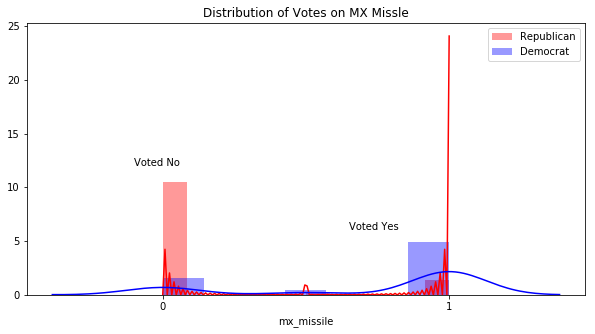

In [0]:
#Visualise voting on mx_missile
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
sns.distplot(rep_on_mx, color='r', label='Republican').set_title("Distribution of Votes on MX Missle")
sns.distplot(dem_on_mx, color='b', label="Democrat")
plt.xticks([0,1])
plt.text(x=-0.1, y=12, s='Voted No')
plt.text(x=0.65, y=6, s='Voted Yes')
plt.legend();


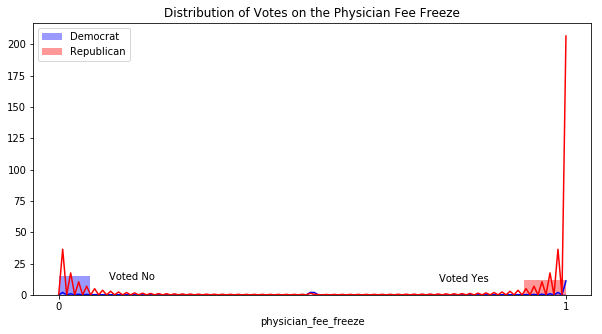

In [0]:
#Visualisze voting on physican_fee_freeze
plt.figure(figsize=(10,5))
sns.distplot(dem_on_fee, color='b', label="Democrat")

sns.distplot(rep_on_fee, color='r', label="Republican").set_title("Distribution of Votes on the Physician Fee Freeze")

plt.xticks([0,1])
plt.text(x=0.1, y=12, s='Voted No')
plt.text(x=0.75, y=10, s='Voted Yes')
plt.legend();

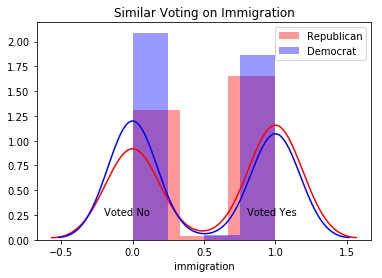

In [0]:
#Visualise similar voting on immigration
import seaborn as sns
sns.distplot(rep_on_imm, color='r', label='Republican').set_title("Similar Voting on Immigration")
sns.distplot(dem_on_imm, color='b', label="Democrat")
plt.text(x=-.20, y=.25, s='Voted No')
plt.text(x=.8, y=.25, s='Voted Yes')
plt.legend();


## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy

Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [0]:
#Generating a 95% confidence interval on 
import numpy as np, scipy.stats as st

confidence_interval = st.t.interval(0.95, len(rep_on_fee)-1, loc=np.mean(rep_on_fee), scale=st.sem(rep_on_fee))
confidence_interval

(0.9634898806720522, 1.0005819756153729)

In [0]:
rep_on_fee_mean = rep_on_fee.mean()
rep_on_fee_dev =  rep_on_fee.std()

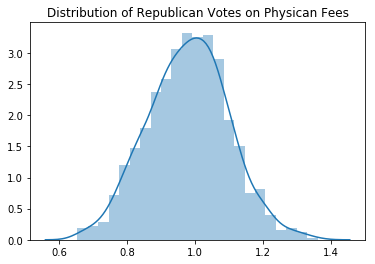

In [0]:
rep_on_fee_sample = np.random.normal(rep_on_fee_mean, rep_on_fee_dev, 1000)
sns.distplot(rep_on_fee_sample)
plt.title('Distribution of Republican Votes on Physican Fees');

When we take a look at our data on Republican voting regarding physician fee freezes, we can see that nearly all of them voted yes. When we replicate data with these statistics  1000 times on a normal distribution we can see that 95% of the time voting on this cause will be likely to be a 'yes'.

In [0]:
!wget https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip

--2019-08-11 03:07:41--  https://resources.lendingclub.com/LoanStats_2019Q1.csv.zip
Resolving resources.lendingclub.com (resources.lendingclub.com)... 64.48.1.20
Connecting to resources.lendingclub.com (resources.lendingclub.com)|64.48.1.20|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘LoanStats_2019Q1.csv.zip’

LoanStats_2019Q1.cs     [              <=>   ]  19.37M  1.67MB/s    in 12s     

2019-08-11 03:07:53 (1.65 MB/s) - ‘LoanStats_2019Q1.csv.zip’ saved [20314386]



In [0]:
!unzip LoanStats_2019Q1.csv.zip

Archive:  LoanStats_2019Q1.csv.zip
  inflating: LoanStats_2019Q1.csv    


In [0]:
!head LoanStats_2019Q1.csv

Notes offered by Prospectus (https://www.lendingclub.com/info/prospectus.action)
"id","member_id","loan_amnt","funded_amnt","funded_amnt_inv","term","int_rate","installment","grade","sub_grade","emp_title","emp_length","home_ownership","annual_inc","verification_status","issue_d","loan_status","pymnt_plan","url","desc","purpose","title","zip_code","addr_state","dti","delinq_2yrs","earliest_cr_line","inq_last_6mths","mths_since_last_delinq","mths_since_last_record","open_acc","pub_rec","revol_bal","revol_util","total_acc","initial_list_status","out_prncp","out_prncp_inv","total_pymnt","total_pymnt_inv","total_rec_prncp","total_rec_int","total_rec_late_fee","recoveries","collection_recovery_fee","last_pymnt_d","last_pymnt_amnt","next_pymnt_d","last_credit_pull_d","collections_12_mths_ex_med","mths_since_last_major_derog","policy_code","application_type","annual_inc_joint","dti_joint","verification_status_joint","acc_now_delinq","tot_coll_amt","tot_cur_bal","open_acc_6m","open_act_il","op

In [0]:
import pandas as pd
loan= pd.read_csv('LoanStats_2019Q1.csv', header=1)
print(loan.shape)
loan.head()

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0,123,124,125,128,129,130,133,138,139,140) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(115677, 144)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,...,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,NaN,NaN,20000.0,20000.0,20000.0,60 months,17.19%,499.10,C,C5,Front desk supervisor,6 years,RENT,47000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,958xx,CA,14.02,0.0,Sep-2006,1.0,50.0,NaN,15.0,0.0,10687.0,19.7%,53.0,w,19031.49,19031.49,1958.20,1958.20,...,12.5,0.0,0.0,75824.0,31546.0,33800.0,21524.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,21225.0,21225.0,21225.0,60 months,14.74%,502.05,C,C2,ceo,10+ years,MORTGAGE,225000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,956xx,CA,16.80,0.0,Sep-1994,2.0,NaN,110.0,14.0,1.0,95868.0,87.7%,22.0,w,20492.06,20492.06,1471.39,1471.39,...,50.0,1.0,0.0,747075.0,209426.0,53500.0,128175.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,5000.0,5000.0,5000.0,36 months,17.97%,180.69,D,D1,NaN,NaN,MORTGAGE,62000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,home_improvement,Home improvement,320xx,FL,19.82,1.0,Nov-1987,0.0,4.0,NaN,8.0,0.0,7285.0,77.5%,18.0,w,4677.78,4677.78,532.09,532.09,...,50.0,0.0,0.0,255738.0,31615.0,9400.0,39938.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,20000.0,20000.0,20000.0,36 months,8.19%,628.49,A,A4,Executive Director of Guardian Advantage,1 year,MORTGAGE,200000.0,Not Verified,Mar-2019,Current,n,NaN,NaN,credit_card,Credit card refinancing,190xx,PA,22.66,1.0,Oct-2001,0.0,18.0,NaN,20.0,0.0,20984.0,32.1%,49.0,w,18513.93,18513.93,1867.27,1867.27,...,22.2,0.0,0.0,448069.0,84744.0,49400.0,105180.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,12000.0,12000.0,12000.0,60 months,15.57%,289.09,C,C3,Computer Operator,5 years,MORTGAGE,49000.0,Source Verified,Mar-2019,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,152xx,PA,13.47,0.0,Apr-1993,0.0,38.0,NaN,18.0,0.0,17672.0,48.2%,36.0,w,11594.62,11594.62,846.51,846.51,...,14.3,0.0,0.0,189260.0,106025.0,24400.0,68860.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
contingency_table = pd.crosstab(loan['home_ownership'],loan['loan_status'], margins=True)
contingency_table

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),All
home_ownership,,,,,,,,
ANY,2,761,0,40,5,3,7,818
MORTGAGE,110,54372,21,3224,274,142,435,58578
NONE,0,1,0,0,0,0,0,1
OWN,52,12187,5,688,46,49,156,13183
RENT,72,40347,23,1889,172,142,450,43095
All,236,107668,49,5841,497,336,1048,115675


In [0]:
row_sums = contingency_table.iloc[0:5, 7].values
col_sums = contingency_table.iloc[5, 0:7].values
row_sums

array([  818, 58578,     1, 13183, 43095])

In [0]:
total = contingency_table.loc['All','All']
total

115675

In [0]:
#compute
expected = []
for i in range(len(row_sums)):
        expected_row = []
        for column in col_sums:
            expected_val = column*row_sums[i]/total
            expected_row.append(expected_val)
        expected.append(expected_row)
        
expected = np.array(expected)
print(expected.shape)
print(expected)

(5, 7)
[[1.66888265e+00 7.61378206e+02 3.46505295e-01 4.13048455e+01
  3.51455371e+00 2.37603631e+00 7.41097039e+00]
 [1.19510767e+02 5.45232427e+04 2.48136762e+01 2.95789149e+03
  2.51681573e+02 1.70150923e+02 5.30708831e+02]
 [2.04019883e-03 9.30780203e-01 4.23600605e-04 5.04949211e-02
  4.29652042e-03 2.90468986e-03 9.05986600e-03]
 [2.68959412e+01 1.22704754e+04 5.58432678e+00 6.65674545e+02
  5.66410287e+01 3.82925265e+01 1.19436214e+02]
 [8.79223687e+01 4.01119729e+04 1.82550681e+01 2.17607863e+03
  1.85158548e+02 1.25177610e+02 3.90434925e+02]]


In [0]:
observed = pd.crosstab(loan['home_ownership'], loan['loan_status']).values

In [0]:
print(observed.shape)
observed

(5, 7)


array([[    2,   761,     0,    40,     5,     3,     7],
       [  110, 54372,    21,  3224,   274,   142,   435],
       [    0,     1,     0,     0,     0,     0,     0],
       [   52, 12187,     5,   688,    46,    49,   156],
       [   72, 40347,    23,  1889,   172,   142,   450]])

In [0]:
chi_square = ((observed - expected)**2 / (expected))
chi_square

array([[6.56958731e-02, 1.87869727e-04, 3.46505295e-01, 4.12208710e-02,
        6.27832401e-01, 1.63857213e-01, 2.27900873e-02],
       [7.56874845e-01, 4.19534228e-01, 5.86133485e-01, 2.39406144e+01,
        1.97913642e+00, 4.65747963e+00, 1.72602749e+01],
       [2.04019883e-03, 5.14770325e-03, 4.23600605e-04, 5.04949211e-02,
        4.29652042e-03, 2.90468986e-03, 9.05986600e-03],
       [2.34315565e+01, 5.67879011e-01, 6.11421567e-02, 7.48753189e-01,
        1.99910728e+00, 2.99405654e+00, 1.11935103e+01],
       [2.88347356e+00, 1.37708906e+00, 1.23332210e+00, 3.78727755e+01,
        9.35130344e-01, 2.26073031e+00, 9.08729695e+00]])

In [0]:
chi_square.sum()

147.5883277407203

In [0]:
#Using scipy
chi_square, p_value, dof, expected = stats.chi2_contingency(observed)
print(chi_square, p_value, dof, expected)

147.5883277407203 9.281620867372023e-20 24 [[1.66888265e+00 7.61378206e+02 3.46505295e-01 4.13048455e+01
  3.51455371e+00 2.37603631e+00 7.41097039e+00]
 [1.19510767e+02 5.45232427e+04 2.48136762e+01 2.95789149e+03
  2.51681573e+02 1.70150923e+02 5.30708831e+02]
 [2.04019883e-03 9.30780203e-01 4.23600605e-04 5.04949211e-02
  4.29652042e-03 2.90468986e-03 9.05986600e-03]
 [2.68959412e+01 1.22704754e+04 5.58432678e+00 6.65674545e+02
  5.66410287e+01 3.82925265e+01 1.19436214e+02]
 [8.79223687e+01 4.01119729e+04 1.82550681e+01 2.17607863e+03
  1.85158548e+02 1.25177610e+02 3.90434925e+02]]


In [0]:
#With a p_value of 9.28 we fail to reject our null hypothesis